In [1]:
import os
from skimage import io
from sklearn import svm

In [2]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import numpy as np 

In [3]:
myImgs = []
myTags = []
enumTags = []
imgdir = 'C://Users/changgoo.kang/resize_images' # Folder containing extracted images C:\Users\changgoo.kang\resize_images


In [18]:
# loop recursively through the folders
dir_num = 0
file_count = 0

for root, folders, filenames in os.walk(imgdir):
    for folder in folders:
        enumTags.append(folder)
        for imgFile in os.listdir(os.path.join(root, folder)):
            # in each folder, get the first file
            filePath = os.path.join(root,folder,imgFile)
            imgSci = io.imread(filePath)
            myImgs.append(np.ravel(imgSci))
            myTags.append(dir_num)
            file_count = file_count + 1
        dir_num = dir_num + 1
        
print(enumTags) 
#['axes', 'boots', 'carabiners', ..... 'helmets', 'insulated_jackets', 'pulleys', 'rope', 'tents']           
print(file_count)  #(2122,)
newArr = np.array(myImgs) #이미지 vecctor
newArrTags = np.array(myTags) #[dir_num 0~11번째 폴더] 

['axes', 'boots', 'carabiners', 'crampons', 'gloves', 'hardshell_jackets', 'harnesses', 'helmets', 'insulated_jackets', 'pulleys', 'rope', 'tents']
2122


In [35]:
#Train with 1/3rd of the data - train 67% test 33% 
X_train, X_test, y_train, y_test = train_test_split(newArr, newArrTags, test_size=0.33, random_state=42)

In [40]:
print(newArr.size) # data 2122 x 
print(len(myTags)) # lables 

104300544
2122


In [45]:
# Create a classifier: a support vector classifier
classifier = LogisticRegression()
# We learn the digits on the first half of the digits
classifier.fit(X_train, y_train)

print(type(newArr))
print(newArr.shape)
print(newArrTags)
print(newArrTags.shape)
print(X_train)

C:\Users\changgoo.kang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\changgoo.kang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


<class 'numpy.ndarray'>
(2122, 49152)
[ 0  0  0 ... 11 11 11]
(2122,)
[[255 255 255 ... 252 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [46]:
# Now predict the value of the digit on the second half:
expected = y_test
predicted = classifier.predict(X_test)

Classification report for classifier LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False):
              precision    recall  f1-score   support

           0       0.64      0.93      0.76        27
           1       0.90      0.93      0.92        30
           2       0.94      0.92      0.93       103
           3       0.87      0.64      0.74        42
           4       0.86      0.53      0.65        70
           5       0.77      0.91      0.84       135
           6       0.96      0.93      0.95        58
           7       0.86      0.73      0.79        26
           8       0.72      0.69      0.70        86
           9       0.80      0.53      0.64        15
          10       0.78      0.89      0.83        66
          11       0.84      1.00      0.91      

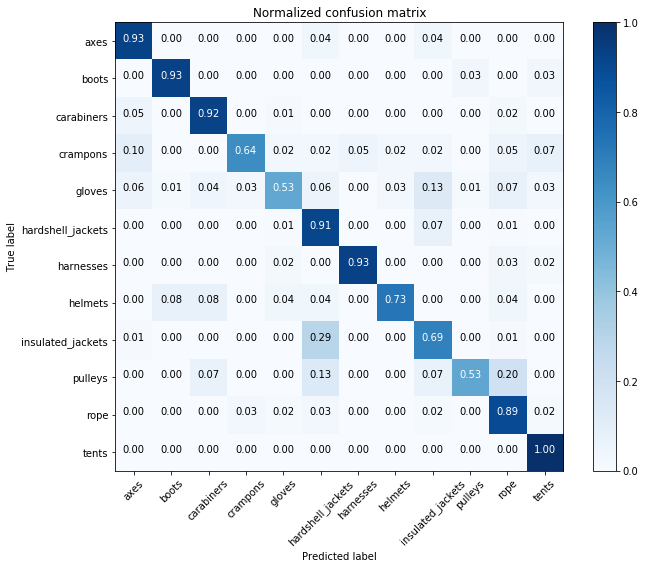

In [47]:
# In[11]:


confusion_matrix = metrics.confusion_matrix(expected, predicted)
print("Classification report for classifier %s:\n%s\n"
       % (classifier, metrics.classification_report(expected, predicted)))
#print("Confusion matrix:\n%s" % confusion_matrix)


# In[12]:


import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# In[13]:


import itertools
# Compute confusion matrix
#cnf_matrix = confusion_matrix(y_test, y_pred)
#np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(confusion_matrix, classes=enumTags, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(10,8))
plot_confusion_matrix(confusion_matrix, classes=enumTags, normalize=True, title='Normalized confusion matrix')

plt.show()


In [78]:
imgdir = 'C://Users/changgoo.kang/skclass_test' # Folder containing extracted images
# loop recursively through the folders
dir_num = 0
for root,folders,filenames in os.walk(imgdir):
    print(root) 
    print(folders) 
    print(filenames)
    for file in filenames:
        # in each folder, get the first file
        filePath = root + '/' + file
        print(filePath)
        # Open it and add it to the figure (in a 4-row grid)
        img = Image.open(filePath)
        #a=fig.add_subplot(4,np.ceil(len(folders)/4),dir_num + 1)
        img.thumbnail((128,128))
        imgNew = Image.new("RGB", (128,128), "white")
        offsetX = int((128 - img.width)/2)
        offsetY = int((128 - img.height)/2)
        imgNew.paste(img, (offsetX, offsetY))
        resizePath = 'C://Users/changgoo.kang/resize_test/'
        if not os.path.exists(resizePath):
            os.mkdir(resizePath)

        imgNew.save(resizePath + file)

C://Users/changgoo.kang/skclass_test
[]
['test01.jpg', 'test02.jpg', 'test03.jpg', 'test04.jpg', 'test05.jpg']
C://Users/changgoo.kang/skclass_test/test01.jpg
C://Users/changgoo.kang/skclass_test/test02.jpg
C://Users/changgoo.kang/skclass_test/test03.jpg
C://Users/changgoo.kang/skclass_test/test04.jpg
C://Users/changgoo.kang/skclass_test/test05.jpg


In [79]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Needed to display matplotlib plots in Jupyter
get_ipython().run_line_magic('matplotlib', 'inline')

imgdir = 'C://Users/changgoo.kang/resized_test/' # Folder containing images to check

# Create a figure to display the images
fig = plt.figure(figsize=(12, 16))

# loop recursively through the folders
dir_num = 0
for root, folders, filenames in os.walk(imgdir):
    for imgFile in filenames:
        # in each folder, get the first file
        filePath = os.path.join(root,imgFile)
        print(root)
        print(imgFile)
        print(filePath)
        # Open it and add it to the figure (in a row1x col5 grid)
        img = Image.open(filePath)
        # subplot(nrows, ncols, index, **kwargs)
        a=fig.add_subplot(1,5,dir_num + 1)
        img.thumbnail((128,128))
        imgNew = Image.new("RGB", (128,128), "white")
        offsetX = int((128 - img.width)/2)
        offsetY = int((128 - img.height)/2)
        imgNew.paste(img, (offsetX, offsetY))
        imgplot = plt.imshow(imgNew)
        # Add the file name (the class of the image)
        #a.set_title(imgFile)
        imgSci = io.imread(filePath)
        imgData = np.array(np.ravel(imgSci)).reshape(1,-1)
        
        prediction = classifier.predict(imgData)
        predictionProb = classifier.predict_proba(imgData)
        a.set_title(enumTags[int(prediction)] + " (" + str(np.max(predictionProb))[0:4] + ")")
        print(np.max(predictionProb))

        dir_num = dir_num + 1


<Figure size 864x1152 with 0 Axes>

C://Users/changgoo.kang/resize_test
[]
['test01.jpg', 'test02.jpg', 'test03.jpg', 'test04.jpg', 'test05.jpg']
C://Users/changgoo.kang/resize_test/test01.jpg
0.9929752623842496
C://Users/changgoo.kang/resize_test/test02.jpg
0.9988697071709219
C://Users/changgoo.kang/resize_test/test03.jpg
0.9983359896496764
C://Users/changgoo.kang/resize_test/test04.jpg
0.5660314861526082
C://Users/changgoo.kang/resize_test/test05.jpg
0.9881982623047434


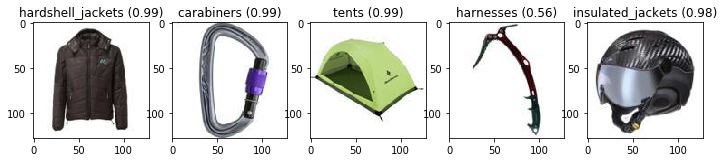

In [84]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Needed to display matplotlib plots in Jupyter
%matplotlib inline

imgdir = 'C://Users/changgoo.kang/resize_test' # Folder containing images to check

# Create a figure to display the images
fig = plt.figure(figsize=(12, 16))

# loop recursively through the folders
dir_num = 0
for root,folders,filenames in os.walk(imgdir):
    print(root) 
    print(folders) 
    print(filenames)
    for file in filenames:
        # in each folder, get the first file
        filePath = root + '/' + file
        print(filePath)
        # Open it and add it to the figure (in a 4-row grid)
        img = Image.open(filePath)
        # subplot(nrows, ncols, index, **kwargs)
        a=fig.add_subplot(1,5,dir_num + 1)
        img.thumbnail((128,128))
        imgNew = Image.new("RGB", (128,128), "white")
        offsetX = int((128 - img.width)/2)
        offsetY = int((128 - img.height)/2)
        imgNew.paste(img, (offsetX, offsetY))
        imgplot = plt.imshow(imgNew)
        # Add the file name (the class of the image)
        #a.set_title(imgFile)
        imgSci = io.imread(filePath)
        imgData = np.array(np.ravel(imgSci)).reshape(1,-1)
        
        prediction = classifier.predict(imgData)
        predictionProb = classifier.predict_proba(imgData)
        a.set_title(enumTags[int(prediction)] + " (" + str(np.max(predictionProb))[0:4] + ")")
        print(np.max(predictionProb))

        dir_num = dir_num + 1

plt.show()